In [13]:
from env_data import *
from plot_data import *
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
import matplotlib
from pymongo import MongoClient
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (30.0, 15.0)

### Feature engineering

In [14]:
ages = list_ages()
followers = count_followers()
followings = count_followings()
media = count_media()
likes = average_likes()
comments = average_comments()
usernames = list_usernames()
sex = list_sex()
caption_lenght = average_lenght_caption()
smileys = average_smileys()
frequency = media_frequency()
video = video_number()
age_classes = list_ages_classes()

In [23]:
features_dataset = np.array([followers, followings, media, likes, comments, 
                        caption_lenght, smileys, frequency, video]).T

training_size = 0.7

features_training = features_dataset[:int(training_size*len(features_dataset))]
features_testing = features_dataset[int(training_size*len(features_dataset)):]

labels_training = sex[:int(training_size*len(features_dataset))]
labels_testing = sex[int(training_size*len(features_dataset)):]

sex_names = ["Female", "Male"]

### SVM

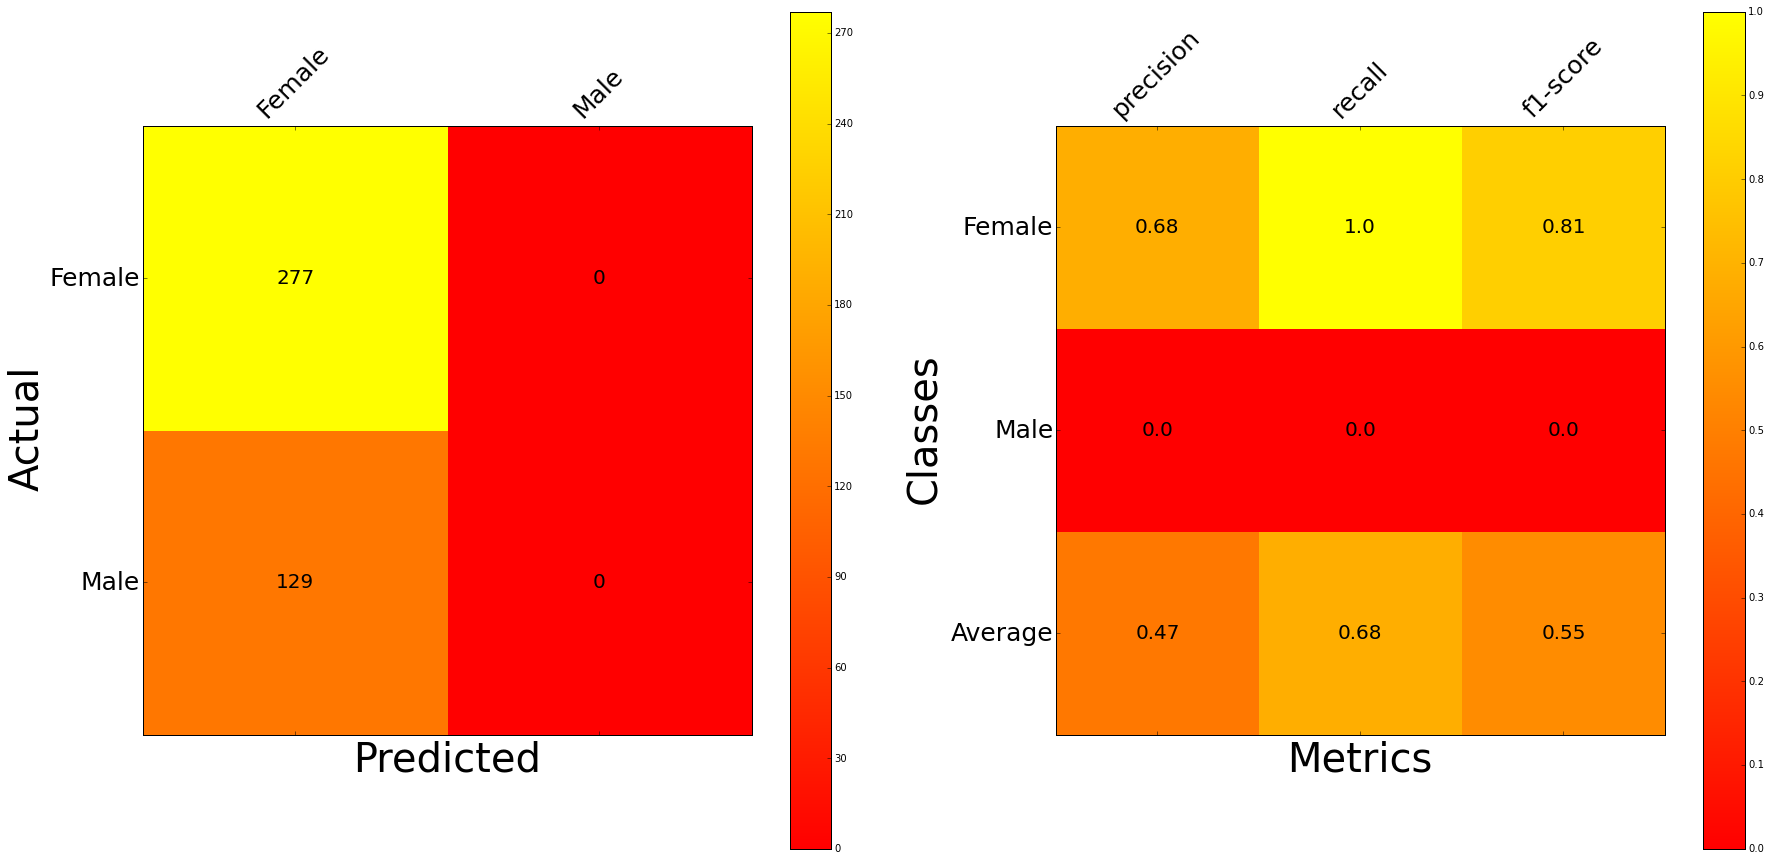

In [21]:
from sklearn import svm
from sklearn import metrics

fig = plt.figure()

classifier = svm.SVC()
classifier.fit(features_training, labels_training)
predicted = classifier.predict(features_testing)

cm = metrics.confusion_matrix(labels_testing, predicted)
report = metrics.classification_report(labels_testing, predicted)
plot_confusion_matrix(fig, cm, sex_names, 121)
plot_classification_report(fig, report, sex_names, 122)

### Decision trees

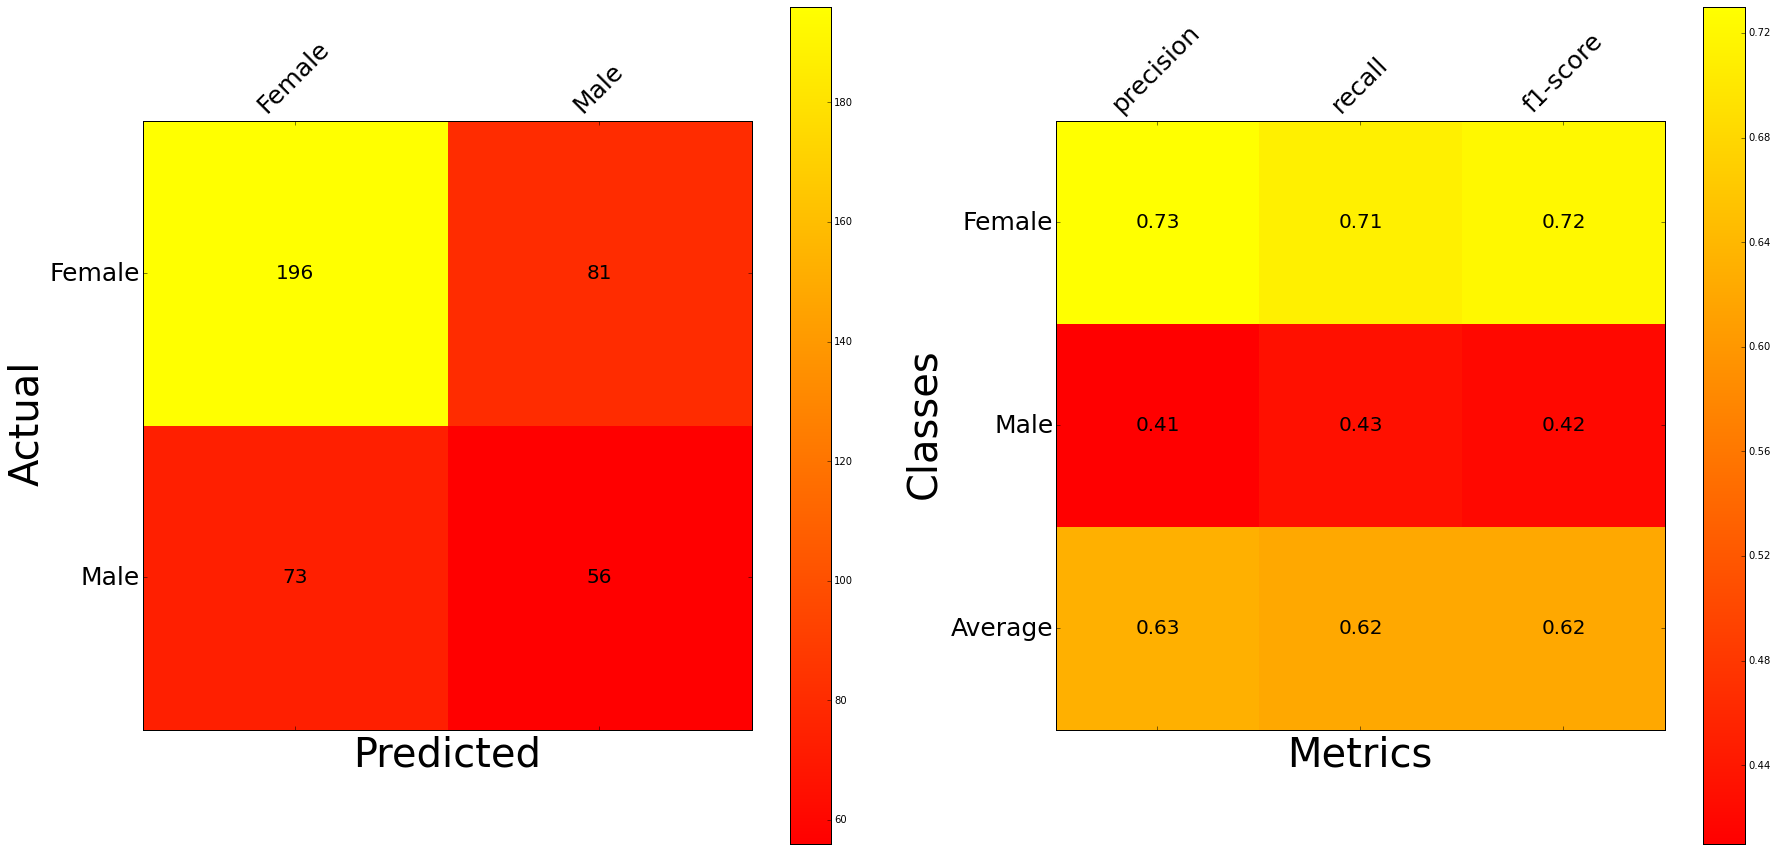

In [16]:
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.cross_validation import KFold

fig = plt.figure()


classifier = DecisionTreeClassifier()
classifier.fit(features_training, labels_training)
predicted = classifier.predict(features_testing)

cm = metrics.confusion_matrix(labels_testing, predicted)
report = metrics.classification_report(labels_testing, predicted)
plot_confusion_matrix(fig, cm, sex_names, 121)
plot_classification_report(fig, report, sex_names, 122)

### K-nearest neighbours

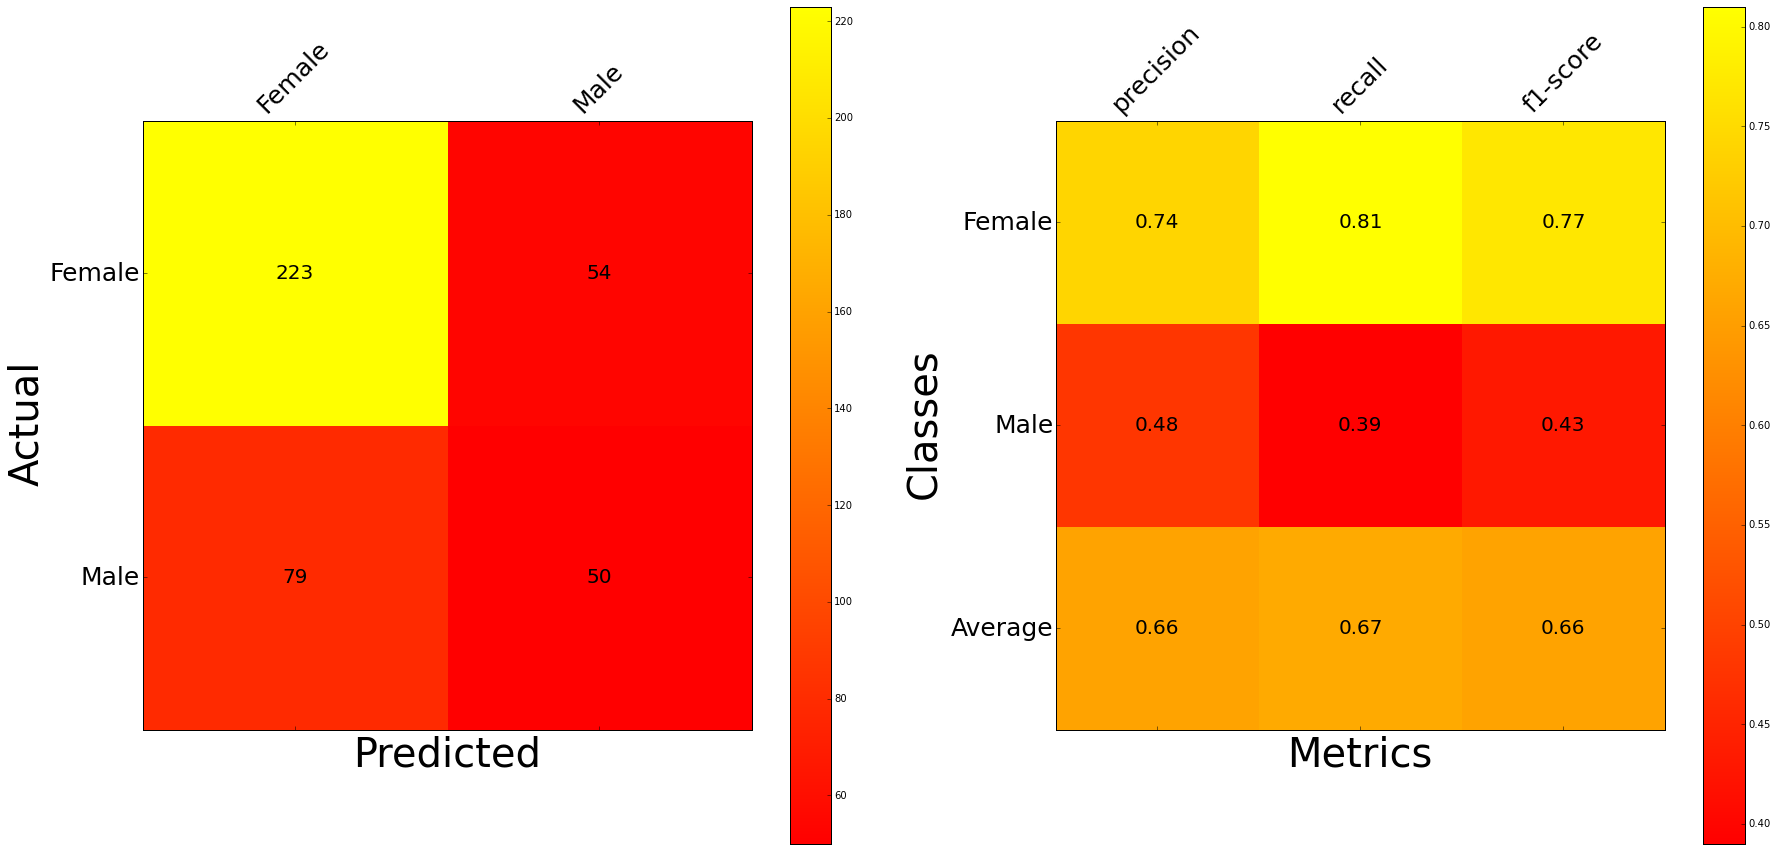

In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.cross_validation import KFold

fig = plt.figure()

classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(features_training, labels_training)
predicted = classifier.predict(features_testing)

cm = metrics.confusion_matrix(labels_testing, predicted)
report = metrics.classification_report(labels_testing, predicted)
plot_confusion_matrix(fig, cm, sex_names, 121)
plot_classification_report(fig, report, sex_names, 122)


### Naive bayes

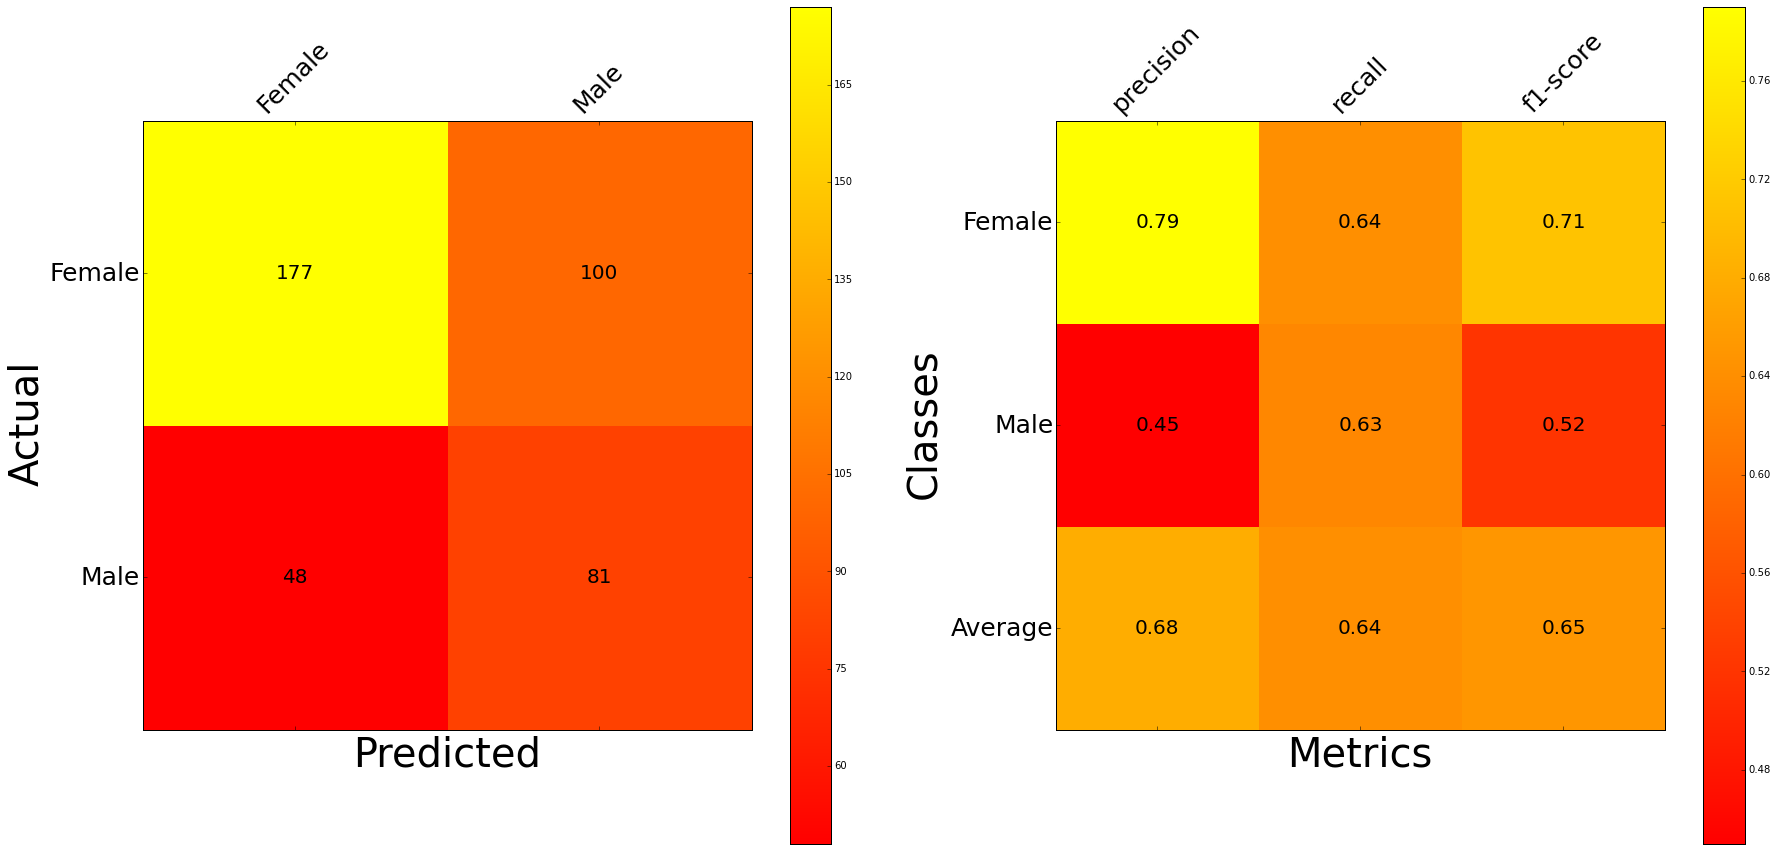

In [18]:
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.cross_validation import KFold

fig = plt.figure()

classifier = GaussianNB()
classifier.fit(features_training, labels_training)
predicted = classifier.predict(features_testing)

cm = metrics.confusion_matrix(labels_testing, predicted)
report = metrics.classification_report(labels_testing, predicted)
plot_confusion_matrix(fig, cm, sex_names, 121)
plot_classification_report(fig, report, sex_names, 122)

### Logistic regression

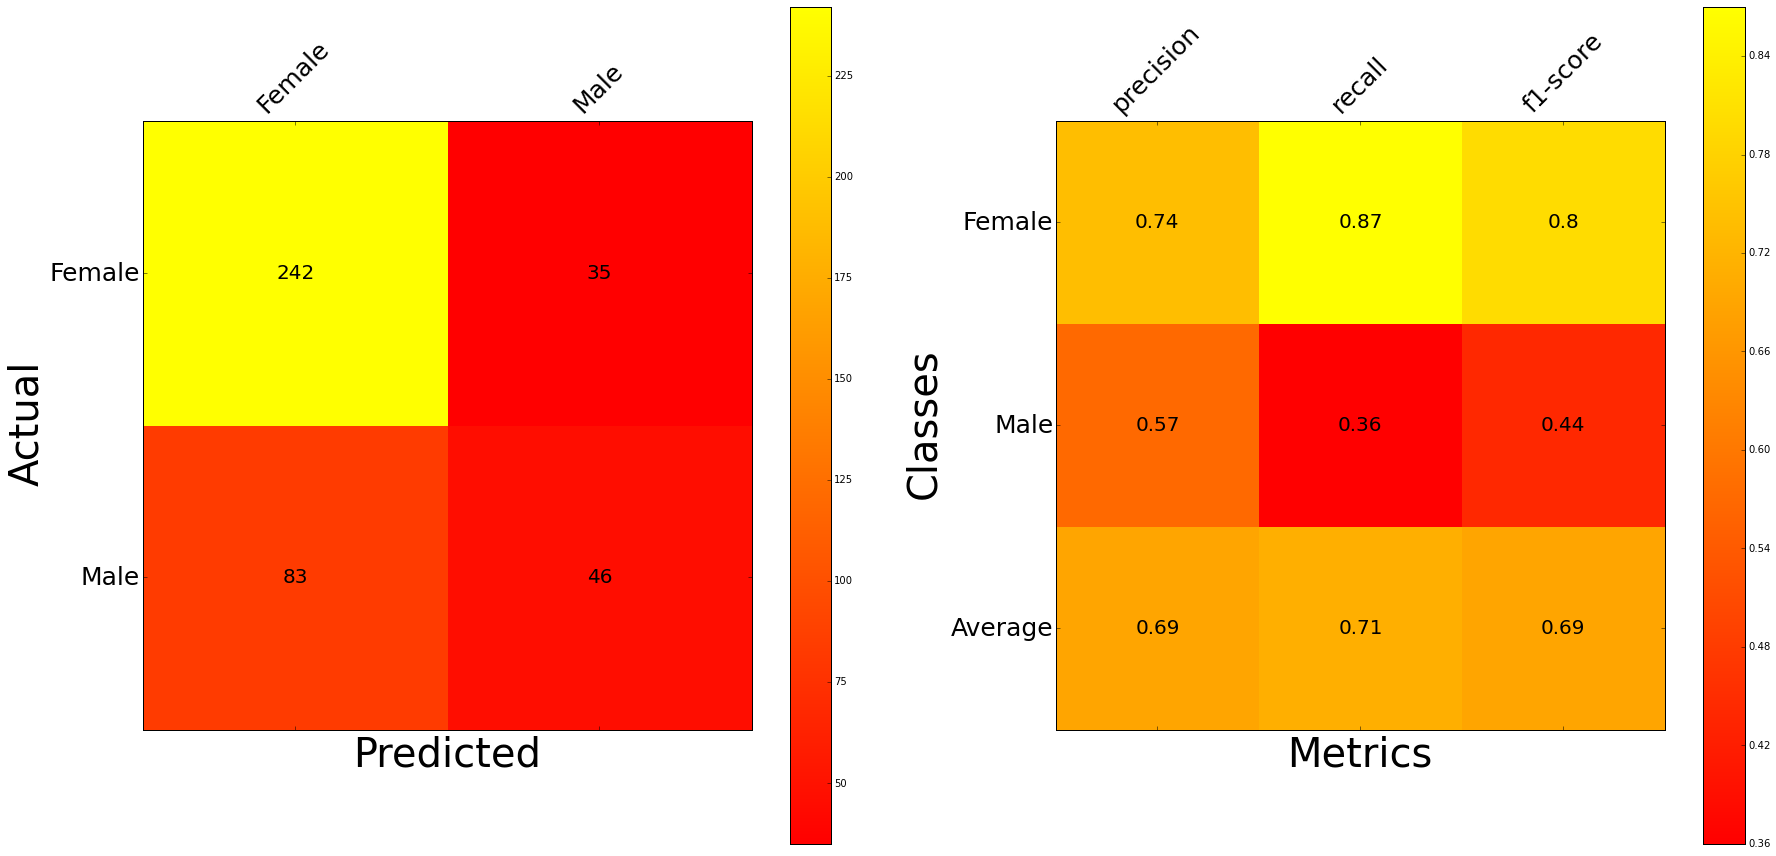

In [19]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import KFold

fig = plt.figure()

classifier = LogisticRegression()
classifier.fit(features_training, labels_training)
predicted = classifier.predict(features_testing)

cm = metrics.confusion_matrix(labels_testing, predicted)
report = metrics.classification_report(labels_testing, predicted)
plot_confusion_matrix(fig, cm, sex_names, 121)
plot_classification_report(fig, report, sex_names, 122)